In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

In [3]:
df=pd.read_csv("student_info.csv")
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.shape

(200, 2)

In [5]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


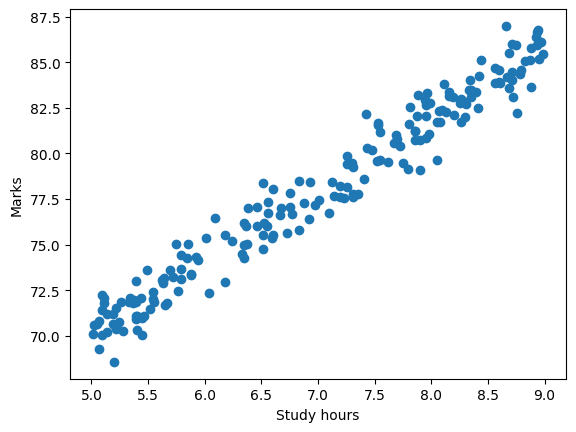

In [7]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("Study hours")
plt.ylabel("Marks")
plt.show()

In [8]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [9]:
df2=df.fillna(df.mean())
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [10]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [20]:
X=df2.drop(['student_marks'],axis=1)
y=df2['student_marks']


In [21]:
X

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [22]:
y.shape

(200,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [25]:
X_train.shape

(160, 1)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg=LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [28]:
reg.coef_

array([3.93571802])

In [30]:
reg.intercept_

50.44735503694244

In [37]:
pred=reg.predict(X_test)
pred

array([83.11381458, 78.9025963 , 84.57003024, 85.82946001, 84.72745896,
       80.75238377, 72.84159055, 71.66087515, 73.23516235, 71.66087515,
       73.47130543, 76.38373677, 73.23516235, 73.58937697, 82.95638585,
       70.40144538, 73.23516235, 78.74516758, 75.55723598, 82.68088559,
       76.65923703, 70.48015974, 74.77009238, 77.98143645, 85.59331693,
       82.56281405, 76.42309395, 85.0423164 , 78.39095296, 81.38209865,
       81.73631327, 83.15317176, 82.20859943, 81.10659839, 73.58937697,
       71.1492318 , 71.89701823, 81.53952737, 72.60544747, 71.93637541])

In [41]:
pd.DataFrame(np.c_[X_test,y_test,pred],columns=["study_hours","student_marks","predicated marks"])

,study_hours,student_marks,predicated marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [42]:
reg.score(X_test,y_test)

0.9514124242154464

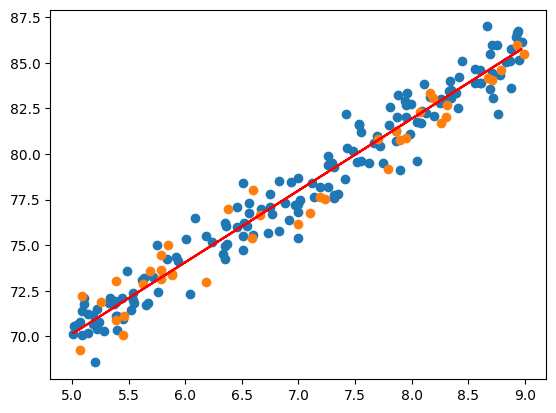

In [44]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.plot(X_train,reg.predict(X_train),color='red')
plt.show()